In [1]:
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from scipy.signal import butter, lfilter, find_peaks_cwt, find_peaks, periodogram
from scipy.stats import kurtosis, skew
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import make_scorer
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

import pickle
import numpy as np
import matplotlib.pyplot as plt

import antropy as ent

import random
import os

In [2]:
SEED = 57
SAMPLING_FREQUENCY = 173.6

In [3]:
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
np.random.seed(SEED)

In [4]:
x = pickle.load(open('../data/x.pkl', 'rb'))
y = pickle.load(open('../data/y.pkl', 'rb'))

In [5]:
x_normal = np.concatenate((x[:300], x[400:]), axis=0)
x_seizure = x[300:400]

print(x_normal.shape)
print(x_seizure.shape)

b, a = butter(3, [0.5,40], btype='bandpass',fs=SAMPLING_FREQUENCY)

x_normal_filtered = np.array([lfilter(b,a,x_normal[index,:]) for index in range(x_normal.shape[0])])
x_seizure_filtered = np.array([lfilter(b,a,x_seizure[index,:]) for index in range(x_seizure.shape[0])])

print(x_normal.shape)
print(x_seizure.shape)

x = np.concatenate((x_normal, x_seizure))
y = np.concatenate((np.zeros((400, 1)), np.ones((100, 1))))

print(x.shape)
print(y.shape)

(400, 4097)
(100, 4097)
(400, 4097)
(100, 4097)
(500, 4097)
(500, 1)


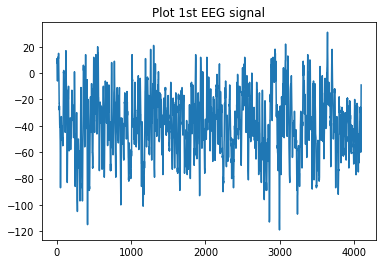

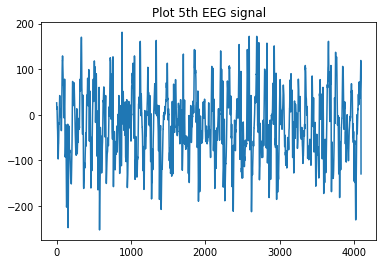

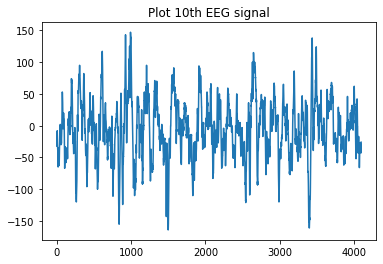

In [6]:
# plot some of the signals and their y values
plt.title('Plot 1st EEG signal')
plt.plot(x[0])
plt.show()

plt.title('Plot 5th EEG signal')
plt.plot(x[5])
plt.show()

plt.title('Plot 10th EEG signal')
plt.plot(x[10])
plt.show()


## Statistical analysis
In order to visualize out data, we begin with the statistical analysis of our data, which we perform with the help of NumPy. Our statistical data are as follows:
- Mean
- Median
- Max
- Min
- Std
- Var
- Sqrt
- Arg Min
- Arg Max

In [7]:
def mean(data):
    return np.mean(data, axis=1)

def median(data):
    return np.median(data, axis=1)

def std(data):
    return np.std(data, axis=1)

def var(data):
    return np.var(data, axis=1)

def minimum(data):
    return np.min(data, axis=1)

def maximum(data):
    return np.max(data, axis=1)

def arg_min(data):
    return np.argmin(data, axis=1)

def arg_max(data):
    return np.argmax(data, axis= 1)

def sqrt(data):
    return np.sqrt(np.mean(data**2, axis=-1))

var = var(x)
std = std(x)
mean = mean(x)
median = median(x)
maximum = maximum(x)
minimum = minimum(x)
arg_min = arg_min(x)
arg_max = arg_max(x)
sqrt = sqrt(x)

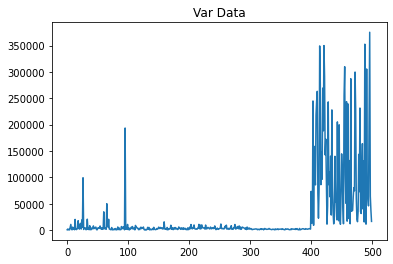

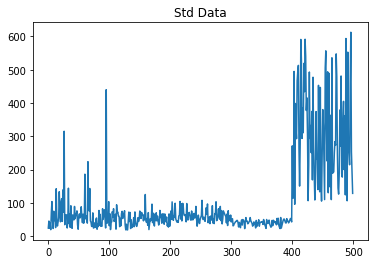

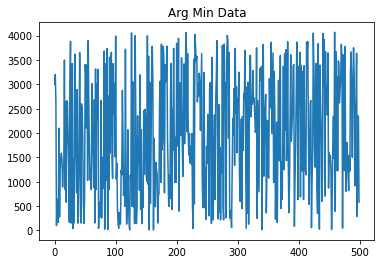

In [8]:
plt.title("Var Data")
plt.plot(var)
plt.show()

plt.title("Std Data")
plt.plot(std)
plt.show()

plt.title("Arg Min Data")
plt.plot(arg_min)
plt.show()

Let's build our new x based on statistical features calculated before.

In [9]:
var = var.reshape(-1, 1)
std = std.reshape(-1, 1)
maximum = maximum.reshape(-1, 1)
minimum = minimum.reshape(-1, 1)
mean = mean.reshape(-1, 1)
median = median.reshape(-1, 1)
sqrt = sqrt.reshape(-1, 1)
arg_min = arg_min.reshape(-1, 1)
arg_max = arg_max.reshape(-1, 1)

new_x = np.concatenate((var, std, maximum, minimum, mean, median, sqrt, arg_max, arg_min), axis=1)
new_x.shape

(500, 9)

In [10]:
x_train, x_test, y_train ,y_test = train_test_split(new_x, y, random_state=SEED, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 9)
(100, 9)
(400, 1)
(100, 1)


In [11]:
clf = SVC(kernel='linear', max_iter=30000000)
clf.fit(x_train, y_train)

y_prediction = clf.predict(x_test)

print(accuracy_score(y_test, y_prediction))

c:\Users\SQ-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.93


c:\Users\SQ-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=30000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


## Entropy analysis
Entropy is proportional to the degree of disorder in a thermodynamic process. The higher the degree of disorder, the higher the entropy.
We continue with the entropy analysis of our data, which we perform with the help of [AntroPy](https://github.com/raphaelvallat/antropy). Our entropic data are as follows:
- Permutation
- Specular
- Single Value Decomposition
- Approximate
- Sample
- Lempel Ziv



In [12]:
# Permutation entropy
def permutation(data):
    return ent.perm_entropy(data, normalize=True)

# Spectral entropy
def spectral(data):
    return ent.spectral_entropy(data, sf=100, method='welch', normalize=True)

# Singular value decomposition entropy
def singular_value_decomposition(data):
    return ent.svd_entropy(data, normalize=True)

# Approximate entropy
def approximate(data):
    return ent.app_entropy(data)

# Sample entropy
def sample(data):
    return ent.sample_entropy(data)

# Lempel-Ziv complexity
def lempel_ziv(data):
    return ent.lziv_complexity('01111000011001', normalize=True)

permutation = np.array([permutation(x[i, :]) for i in range(x.shape[0])])
spectral = np.array([spectral(x[i, :]) for i in range(x.shape[0])])
singular_value_decomposition = np.array([singular_value_decomposition(x[i, :]) for i in range(x.shape[0])])
approximate = np.array([approximate(x[i, :]) for i in range(x.shape[0])])
lempel_ziv = np.array([lempel_ziv(x[i, :]) for i in range(x.shape[0])])
sample = np.array([sample(x[i, :]) for i in range(x.shape[0])])

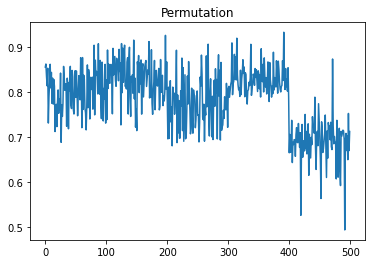

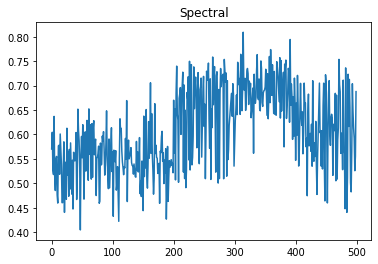

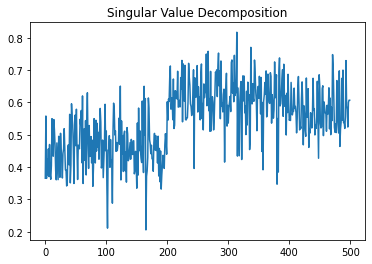

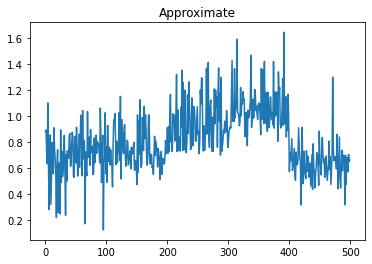

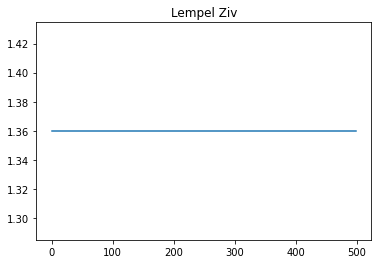

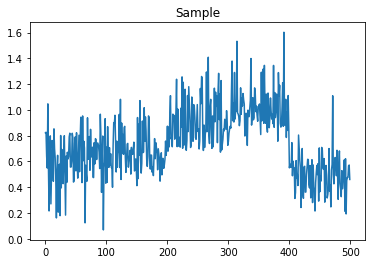

In [13]:
plt.title('Permutation')
plt.plot(permutation)
plt.show()

plt.title('Spectral')
plt.plot(spectral)
plt.show()

plt.title('Singular Value Decomposition')
plt.plot(singular_value_decomposition)
plt.show()

plt.title('Approximate')
plt.plot(approximate)
plt.show()

plt.title('Lempel Ziv')
plt.plot(lempel_ziv)
plt.show()

plt.title('Sample')
plt.plot(sample)
plt.show()


Let's build our new x based on fast fourier transform features calculated before.

In [14]:
permutation = permutation.reshape(-1, 1)
spectral = spectral.reshape(-1, 1)
approximate = approximate.reshape(-1, 1)
singular_value_decomposition = singular_value_decomposition.reshape(-1, 1)
lempel_ziv = lempel_ziv.reshape(-1, 1)
sample = sample.reshape(-1, 1)

new_x = np.concatenate((permutation, spectral, approximate, singular_value_decomposition, lempel_ziv, sample), axis=1)
new_x.shape

(500, 6)

In [15]:
x_train, x_test, y_train ,y_test = train_test_split(new_x, y, random_state=SEED, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 6)
(100, 6)
(400, 1)
(100, 1)


In [16]:
clf = SVC(kernel='linear', max_iter=20000000)
clf.fit(x_train, y_train)

y_prediction = clf.predict(x_test)

print(accuracy_score(y_test, y_prediction))

0.91


c:\Users\SQ-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## What is FFT?

A fast Fourier transform is an algorithm that computes the discrete Fourier transform of a sequence, or its inverse. Fourier analysis converts a signal from its original domain to a representation in the frequency domain and vice versa.

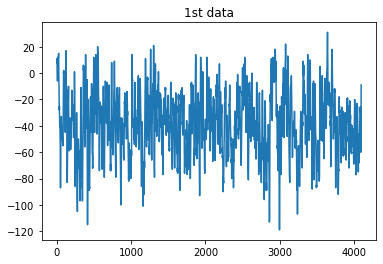

c:\Users\SQ-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


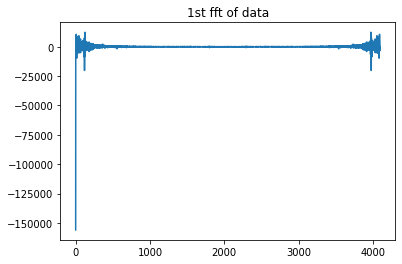

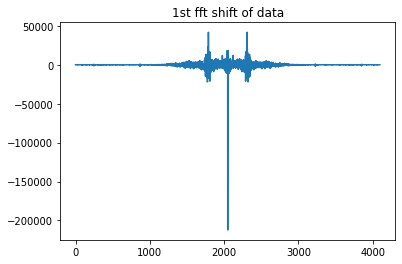

In [17]:
fft = np.fft.fft(x)
fft_shift = np.fft.fftshift(fft)

plt.title('1st data')
plt.plot(x[0])
plt.show()

plt.title('1st fft of data')
plt.plot(fft[0])
plt.show()

plt.title('1st fft shift of data')
plt.plot(fft_shift[0])
plt.show()

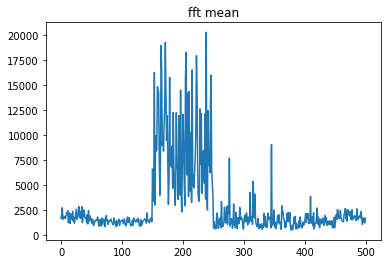

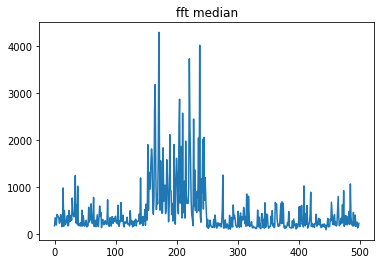

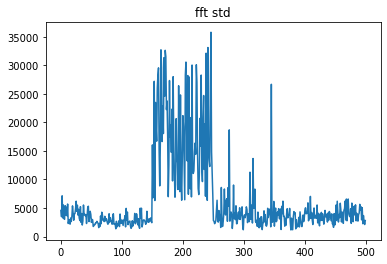

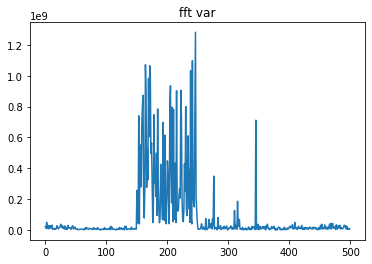

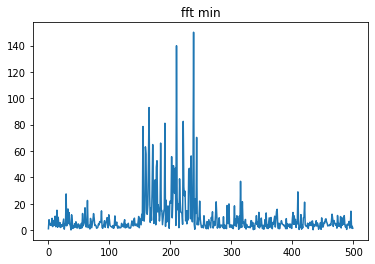

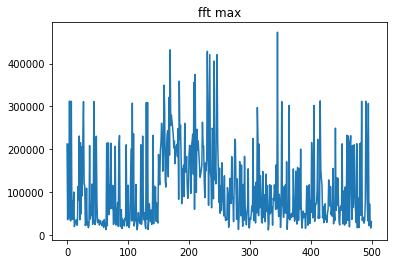

In [18]:
fft_abs = np.abs(fft_shift)
fft_mean = np.mean(fft_abs, axis=1)
fft_var = np.var(fft_abs, axis=1)
fft_median = np.median(fft_abs, axis=1)
fft_std = np.std(fft_abs, axis=1)
fft_max = np.max(fft_abs, axis=1)
fft_min = np.min(fft_abs, axis=1)

plt.title('fft mean')
plt.plot(fft_mean)
plt.show()

plt.title('fft median')
plt.plot(fft_median)
plt.show()

plt.title('fft std')
plt.plot(fft_std)
plt.show()

plt.title('fft var')
plt.plot(fft_var)
plt.show()

plt.title('fft min')
plt.plot(fft_min)
plt.show()

plt.title('fft max')
plt.plot(fft_max)
plt.show()

Let's build our new x based on fast fourier transform features calculated before.

In [19]:
fft_mean = fft_mean.reshape(-1, 1)
fft_median = fft_median.reshape(-1, 1)
fft_var = fft_var.reshape(-1, 1)
fft_std = fft_std.reshape(-1, 1)
fft_max = fft_max.reshape(-1, 1)
fft_min = fft_min.reshape(-1, 1)

new_x = np.concatenate((fft_mean, fft_median, fft_std, fft_var, fft_max, fft_min), axis=1)
print(new_x.shape)

(500, 6)


In [20]:
x_train, x_test, y_train ,y_test = train_test_split(new_x, y, random_state=SEED, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 6)
(100, 6)
(400, 1)
(100, 1)


In [21]:
clf = SVC(kernel='linear', max_iter=20000000)
clf.fit(x_train, y_train)

y_prediction = clf.predict(x_test)

print(accuracy_score(y_test, y_prediction))

c:\Users\SQ-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.74


c:\Users\SQ-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=20000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


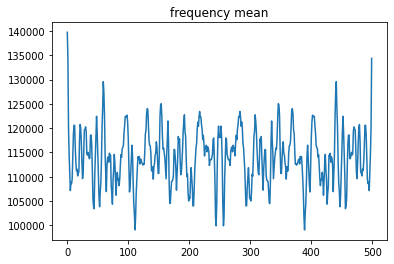

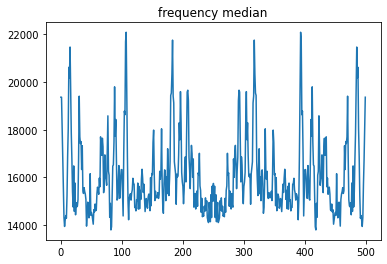

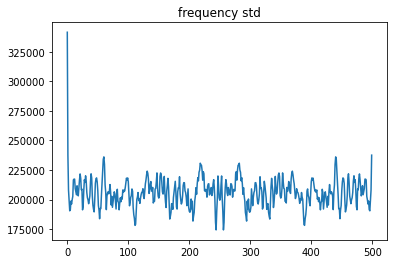

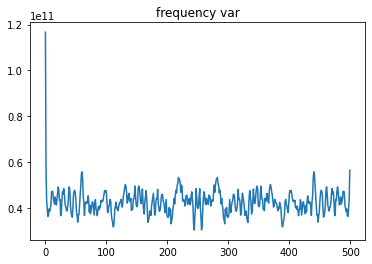

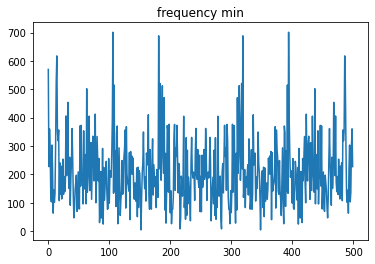

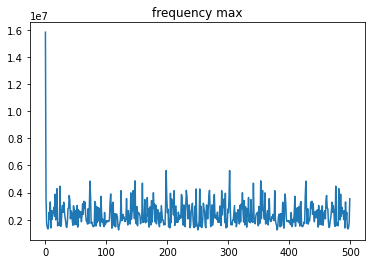

In [22]:
frequency = np.fft.fft2(x)
frequency_abs = np.abs(frequency)
frequency_mean = np.mean(frequency_abs, axis=1)
frequency_median = np.median(frequency_abs, axis=1)
frequency_var = np.var(frequency_abs, axis=1)
frequency_std = np.std(frequency_abs, axis=1)
frequency_min = np.min(frequency_abs, axis=1)
frequency_max = np.max(frequency_abs, axis=1)

plt.title('frequency mean')
plt.plot(frequency_mean)
plt.show()

plt.title('frequency median')
plt.plot(frequency_median)
plt.show()

plt.title('frequency std')
plt.plot(frequency_std)
plt.show()

plt.title('frequency var')
plt.plot(frequency_var)
plt.show()

plt.title('frequency min')
plt.plot(frequency_min)
plt.show()

plt.title('frequency max')
plt.plot(frequency_max)
plt.show()

Let's build our new x based on fast fourier transform features calculated before.

In [23]:
frequency_mean = frequency_mean.reshape(-1, 1)
frequency_median = frequency_median.reshape(-1, 1)
frequency_var = frequency_var.reshape(-1, 1)
frequency_std = frequency_std.reshape(-1, 1)
frequency_max = frequency_max.reshape(-1, 1)
frequency_min = frequency_min.reshape(-1, 1)

new_x = np.concatenate((frequency_mean, frequency_median, frequency_std, frequency_var, frequency_max, frequency_min), axis=1)
print(new_x.shape)

(500, 6)


In [24]:
x_train, x_test, y_train ,y_test = train_test_split(new_x, y, random_state=SEED, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 6)
(100, 6)
(400, 1)
(100, 1)


In [25]:
clf = SVC(kernel='linear', max_iter=30000000)
clf.fit(x_train, y_train)

y_prediction = clf.predict(x_test)

print(accuracy_score(y_test, y_prediction))

c:\Users\SQ-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.26


c:\Users\SQ-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=30000000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [26]:
#calculate the energy of each signal
energy = np.sum(x**2, axis=1)
print(energy.shape)

(500,)


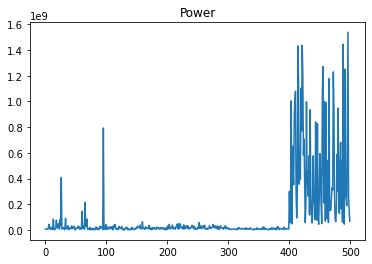

In [27]:
plt.title('Power')
plt.plot(energy)
plt.show()

energy = energy.reshape(-1, 1)

In [28]:
# calculate power spectral density for each signal
power_specular = np.array([periodogram(x[ind, :])[1] for ind in range(x.shape[0])])
print(power_specular.shape)

(500, 2049)


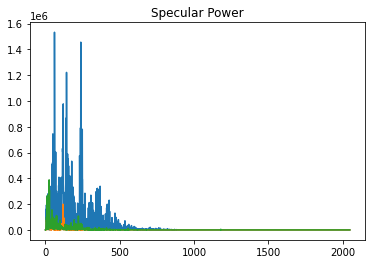

In [29]:
plt.title('Specular Power')
plt.plot(power_specular[-1])
plt.plot(power_specular[0])
plt.plot(power_specular[1])
plt.show()

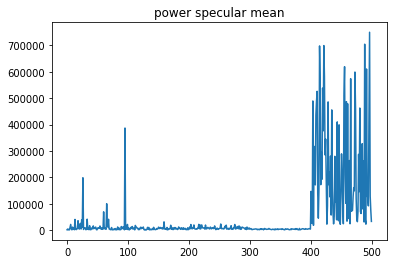

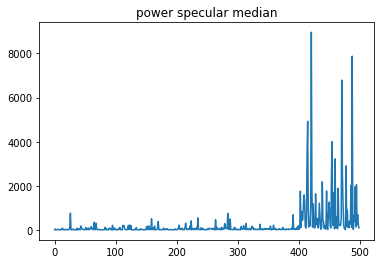

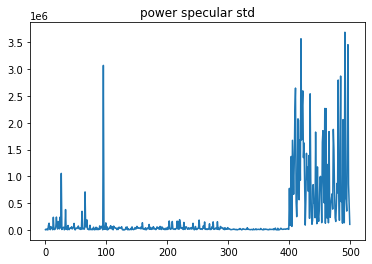

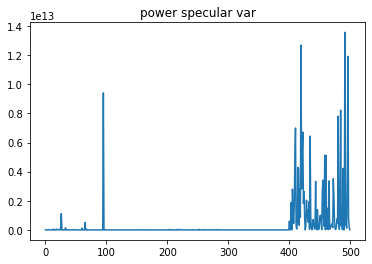

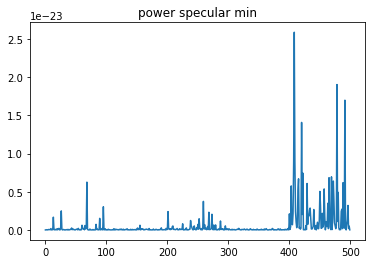

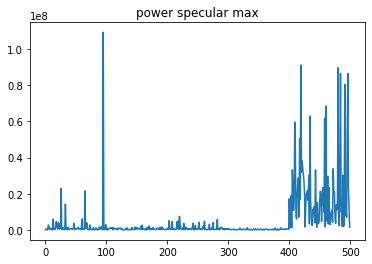

In [30]:
power_specular_mean = np.mean(power_specular, axis=1)
power_specular_median = np.median(power_specular, axis=1)
power_specular_std = np.std(power_specular, axis=1)
power_specular_var = np.var(power_specular, axis=1)
power_specular_min = np.min(power_specular, axis=1)
power_specular_max = np.max(power_specular, axis=1)

plt.title('power specular mean')
plt.plot(power_specular_mean)
plt.show()

plt.title('power specular median')
plt.plot(power_specular_median)
plt.show()

plt.title('power specular std')
plt.plot(power_specular_std)
plt.show()

plt.title('power specular var')
plt.plot(power_specular_var)
plt.show()

plt.title('power specular min')
plt.plot(power_specular_min)
plt.show()

plt.title('power specular max')
plt.plot(power_specular_max)
plt.show()

power_specular_mean = power_specular_mean.reshape(-1, 1)
power_specular_median = power_specular_median.reshape(-1, 1)
power_specular_std = power_specular_std.reshape(-1, 1)
power_specular_var = power_specular_var.reshape(-1, 1)
power_specular_min = power_specular_min.reshape(-1, 1)
power_specular_max = power_specular_max.reshape(-1, 1)

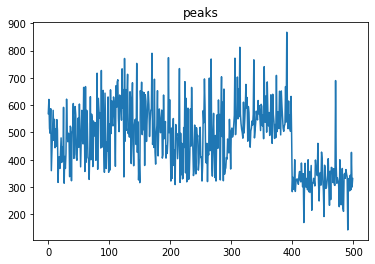

In [31]:
#detect peaks
peaks = np.array([find_peaks(x[i, :])[0].shape[0] for i in range(x.shape[0])])

plt.title('peaks')
plt.plot(peaks)
plt.show()

peaks = peaks.reshape(-1, 1)

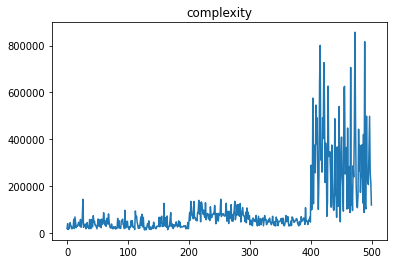

In [32]:
#calculate complexity
complexity = np.array([np.sum(np.abs(np.diff(x[i, :]))) for i in range(x.shape[0])])

plt.title('complexity')
plt.plot(complexity)
plt.show()

complexity = complexity.reshape(-1, 1)

In [33]:
new_x = np.concatenate((var, 
                        mean, 
                        maximum, 
                        minimum, 
                        median, 
                        std, 
                        var, 
                        permutation, 
                        spectral, 
                        singular_value_decomposition, 
                        approximate, 
                        sample, 
                        lempel_ziv, 
                        fft_mean, 
                        fft_median, 
                        fft_var, 
                        fft_std, 
                        fft_max, 
                        fft_min,
                        power_specular_mean,
                        power_specular_median,
                        power_specular_std,
                        power_specular_var,
                        power_specular_min,
                        power_specular_max,
                        energy,
                        peaks,
                        complexity), axis=1)

x_train, x_test, y_train, y_test = train_test_split(new_x, y, random_state=SEED, test_size=0.2)
print(new_x.shape)
print(new_x)

(500, 28)
[[ 5.85240101e+02 -3.80785941e+01  3.10000000e+01 ...  8.33829400e+06
   5.69000000e+02  1.86870000e+04]
 [ 2.04747837e+03 -1.23775934e+01  1.92000000e+02 ...  9.01619900e+06
   6.21000000e+02  4.03000000e+04]
 [ 5.58204044e+02  2.78664877e+01  9.20000000e+01 ...  5.46845100e+06
   5.15000000e+02  1.48300000e+04]
 ...
 [ 6.41967333e+04 -5.22089334e-01  6.83000000e+02 ...  2.63015133e+08
   4.27000000e+02  2.57480000e+05]
 [ 3.73167473e+04 -1.50078106e+01  5.55000000e+02 ...  1.53809499e+08
   3.00000000e+02  2.16483000e+05]
 [ 1.64935065e+04 -1.86465707e+01  3.99000000e+02 ...  6.89984010e+07
   3.31000000e+02  1.19561000e+05]]


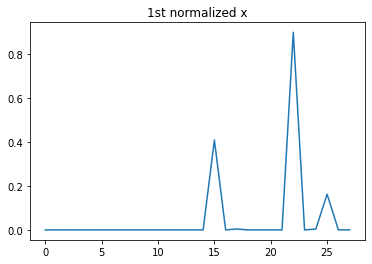

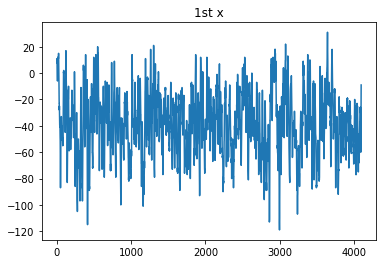

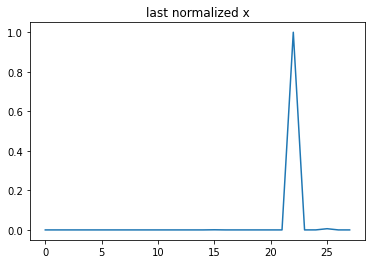

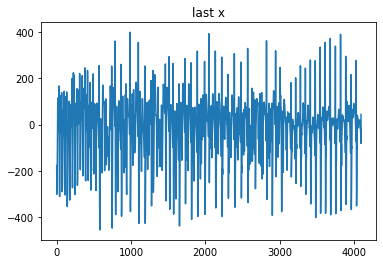

In [34]:
normalized_x = normalize(new_x)

plt.title('1st normalized x')
plt.plot(normalized_x[0])
plt.show()

plt.title('1st x')
plt.plot(x[0])
plt.show()

plt.title('last normalized x')
plt.plot(normalized_x[-1])
plt.show()

plt.title('last x')
plt.plot(x[-1])
plt.show()

## RANDOM FOREST CLASSIFIER

* n_estimators:
The number of trees in the forest.

* max_depth:
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

* min_samples_split:
The minimum number of samples required to split an internal node: If int, then consider min_samples_split as the minimum number. If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

* random_state:
Controls both the randomness of the bootstrapping of the samples used when building trees (if bootstrap=True) and the sampling of the features to consider when looking for the best split at each node (if max_features < n_features). See Glossary for details.

In [35]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
rf_clf.fit(x_train, y_train)
y_prediction = rf_clf.predict(x_test)

print(accuracy_score(y_test, y_prediction))
print(recall_score(y_test, y_prediction))
print(precision_score(y_test, y_prediction))

0.98
0.9230769230769231
1.0


C:\Users\SQ-PC\AppData\Local\Temp\ipykernel_22840\1955905250.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(x_train, y_train)


In [36]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f1': make_scorer(f1_score),
}

cv = KFold(n_splits=5, random_state=SEED, shuffle=True)
cross_validate = cross_validate(estimator=rf_clf, X=new_x, y=y, cv=cv)
cross_validate

c:\Users\SQ-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\SQ-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\SQ-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\SQ-PC\AppData\Local\Programs\Pytho

{'fit_time': array([0.13025784, 0.19755673, 0.36418915, 0.43604851, 0.34371948]),
 'score_time': array([0.00945807, 0.02500463, 0.07302117, 0.02229095, 0.02329159]),
 'test_score': array([0.98, 0.95, 1.  , 0.98, 0.97])}

In [39]:
scores = cross_val_score(rf_clf, new_x, y, cv=5)
print("k-fold cross validation accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

c:\Users\SQ-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\SQ-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\SQ-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\SQ-PC\AppData\Local\Programs\Pytho

k-fold cross validation accuracy: 0.97 (+/- 0.07)


c:\Users\SQ-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
